In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [ ]:
import keras

In [ ]:
# Importing a library dor spliting the data for train, validation, and testing
#!pip install pydrive
#!pip install split-folders
import os
import splitfolders

In [ ]:
# Source of the data
source_file='DATASET'

In [ ]:
# Creating the folder for training, validation, and testing
#os.mkdir('/content/drive/MyDrive/Banana Disease Detection/Dataset/Split/train')
#os.mkdir('/content/drive/MyDrive/Banana Disease Detection/Dataset/Split/val')
#os.mkdir('/content/drive/MyDrive/Banana Disease Detection/Dataset/Split/test')

In [ ]:
# Spliting the data based on 80-10-10 spliting ratio
#splitfolders.ratio(source_file, output='/content/drive/MyDrive/Banana Disease Detection/Dataset/Split', seed=1337, ratio=(.8, .1, .1), group_prefix=None)

Import all the neccessary libraries

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten,Dropout
from keras.models import Model
#from tensorflow.python.keras.applications.vgg19 import VGG19
#from tensorflow.python.keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import layers
from keras.layers import *
from keras.utils import np_utils
import sys
import gc
from tqdm import tqdm
# import all the necessary modules
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import os
import random
import cv2
import imutils
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from keras.utils import np_utils
from keras.models import Sequential
from keras import optimizers
from sklearn.preprocessing import LabelBinarizer
from keras import backend as K
from keras.layers import Dense, Activation, Flatten, Dense,MaxPooling2D, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from PIL import Image
import os, sys
import os
import os.path
from PIL import Image
import glob

Resize the input image

In [ ]:
# re-size all the images to this
#Resizing the images
IMAGE_WIDTH = 32
IMAGE_HEIGHT = 32
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
INPUT_SHAPE = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)

Load the traiing, validation, and testing folder

In [ ]:
train_path="DATASET/train"
test_path="DATASET/test"
val_path="DATASET/test"

**Partition to a numpy array**

x_train: Numpy arrays of the images of the training dataset

y_train: Labels of the training dataset

x_test: Numpy arrays of the images of the testing dataset

y_test: Labels of the testing dataset

x_val: Numpy arrays of the images of the validation dataset

y_val: Labels of the validation dataset

In [ ]:
#Numpy arrays of the images of the training dataset
x_train=[]

for folder in os.listdir(train_path):

    sub_path=train_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(32,32))

        x_train.append(img_arr)

In [ ]:
#Numpy arrays of the images of the validation dataset
x_val=[]

for folder in os.listdir(val_path):

    sub_path=val_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(32,32))

        x_val.append(img_arr)

In [ ]:
#Numpy arrays of the images of the testing dataset
x_test=[]

for folder in os.listdir(test_path):

    sub_path=test_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(32,32))

        x_test.append(img_arr)

In [ ]:
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)

In [ ]:
train_x.shape,test_x.shape,val_x.shape

((999, 32, 32, 3), (412, 32, 32, 3), (412, 32, 32, 3))

In [ ]:
#must be divided by 255.0 for normalization.
train_x=train_x/255.0
test_x=test_x/255.0
val_x=val_x/255.0

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1)


training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (32,32),
                                                 batch_size = 32,
                                                 class_mode = 'sparse')

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (32,32),
                                            batch_size = 32,
                                            class_mode = 'sparse')

val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (32,32),
                                            batch_size = 32,
                                            class_mode = 'sparse')

Found 999 images belonging to 2 classes.
Found 412 images belonging to 2 classes.
Found 412 images belonging to 2 classes.


In [ ]:
# To generate the classes of training dataset
training_set.class_indices

{'normal': 0, 'pancreatic_tumor': 1}

In [ ]:
train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes

In [ ]:
train_y.shape,test_y.shape,val_y.shape

((999,), (412,), (412,))

In [ ]:
from tensorflow.keras.utils import to_categorical
train_y = to_categorical(train_y, 2)
test_y = to_categorical(test_y, 2)
val_y = to_categorical(val_y, 2)

In [ ]:

model = Sequential()

model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (32,32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size = 4, activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(2, activation='softmax'))

In [ ]:
model.build(INPUT_SHAPE) # `input_shape` is the shape of the input data
                         # e.g. input_shape = (None, 100, 100, 3)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_7 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_8 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 32)        25632     
                                                                 
 batch_normalization_9 (Batc  (None, 14, 14, 32)      

Total params: 327,554
Trainable params: 326,722
Non-trainable params: 832
_________________________________________________________________


In [ ]:
# COMPILE WITH ADAM OPTIMIZER AND CROSS ENTROPY COST
model.compile(loss='CategoricalCrossentropy', optimizer="Adam", metrics=['accuracy'])

In [ ]:
import time
start_time = time.time()
history = model.fit(train_x,train_y, epochs=19, batch_size=32, validation_data = (val_x, val_y),  verbose=1)
print("Execution time: " + str((time.time() - start_time)) + ' sec')

Epoch 1/19
32/32 [==============================] - 10s 150ms/step - loss: 0.1814 - accuracy: 0.9469 - val_loss: 0.8350 - val_accuracy: 0.5461
Epoch 2/19
32/32 [==============================] - 4s 128ms/step - loss: 0.0709 - accuracy: 0.9770 - val_loss: 1.0398 - val_accuracy: 0.5461
Epoch 3/19
32/32 [==============================] - 4s 131ms/step - loss: 0.0589 - accuracy: 0.9820 - val_loss: 2.2372 - val_accuracy: 0.5461
Epoch 4/19
32/32 [==============================] - 4s 130ms/step - loss: 0.0668 - accuracy: 0.9790 - val_loss: 0.5825 - val_accuracy: 0.7306
Epoch 5/19
32/32 [==============================] - 5s 142ms/step - loss: 0.0583 - accuracy: 0.9770 - val_loss: 0.7347 - val_accuracy: 0.5461
Epoch 6/19
32/32 [==============================] - 5s 145ms/step - loss: 0.0629 - accuracy: 0.9760 - val_loss: 0.8022 - val_accuracy: 0.5461
Epoch 7/19
32/32 [==============================] - 4s 135ms/step - loss: 0.0429 - accuracy: 0.9840 - val_loss: 0.6464 - val_accuracy: 0.5752
Epoch

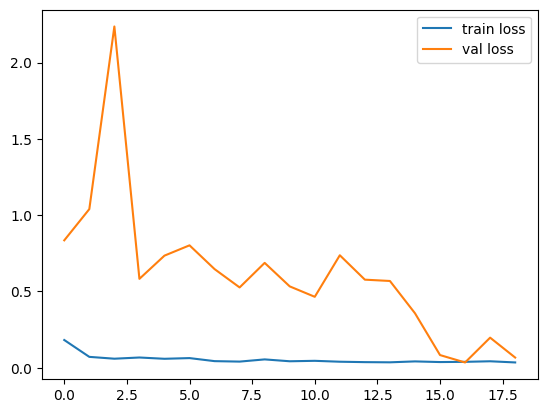

In [ ]:
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()

plt.savefig('loss-rps-1.svg')
plt.show()

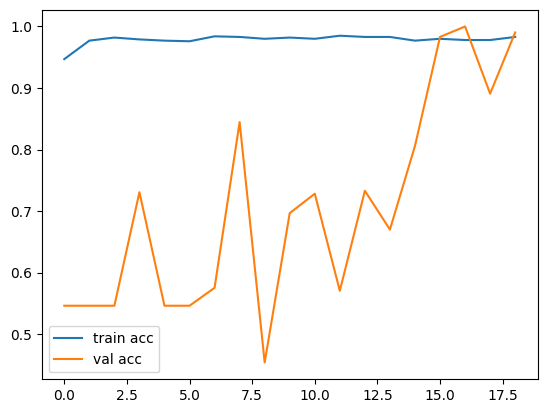

In [ ]:
# accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()

plt.savefig('acc-rps-1.svg')
plt.show()

In [ ]:
model.evaluate(test_x,test_y,batch_size=32)

13/13 [==============================] - 1s 34ms/step - loss: 0.0664 - accuracy: 0.9903


[0.06637226790189743, 0.9902912378311157]

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

In [ ]:
#Classification metrics and confussion matrix
print('test data', test_x)
preds = np.round(model.predict(test_x),0)
#to fit them into classification metrics and confusion metrics, some additional modificaitions are required
print('rounded test_labels', preds)

test data [[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.00392157 0.00392157 0.00392157]
   ...
   [0.00392157 0.00392157 0.00392157]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.       

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
Classes = ['Normal', 'Cancer']
classification_metrics = metrics.classification_report(test_y, preds, target_names=bananas )
print(classification_metrics)

              precision    recall  f1-score   support

      Normal       0.98      1.00      0.99       225
      Cancer       1.00      0.98      0.99       187

   micro avg       0.99      0.99      0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412
 samples avg       0.99      0.99      0.99       412



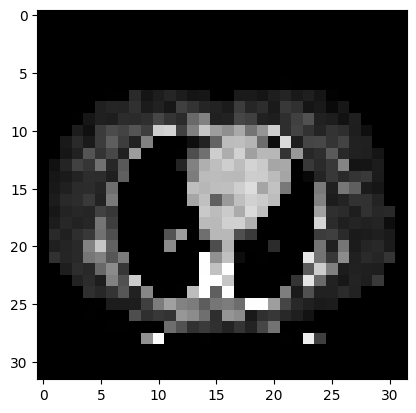

1/1 [==============================] - 0s 73ms/step
Cancer


In [ ]:
from tensorflow.keras.utils import load_img,img_to_array
import os
import matplotlib.pyplot as plt
flag=0
path = "DATASET/sample"
for img in os.listdir(path):
    img = load_img(os.path.join(path, img), target_size=(32,32))  # Correct way to load images
    plt.imshow(img)
    plt.show()
    x=img_to_array(img)
    x=np.expand_dims(x,axis=0)
    images=np.vstack([x])
    pred=model.predict(images,batch_size=1)
    if pred[0][0]>0.5:
        print("healthy")
    elif pred[0][1]>0.5:
        print("Cancer")
        flag=1

    else:
        print("Unknown")

In [ ]:
#Saving the model
model.save("M1.h5") #using h5 extension
print("model saved!!!")

model saved!!!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


*MARKER TEST MODEL*

In [ ]:
import pandas as pd
import pycaret
import seaborn as sns
import missingno as msno
import numpy as np
from pycaret.classification import *
sns.set()
sns.set_context("paper")
pd.set_option('display.max_colwidth', None)
import matplotlib.pyplot as plt



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/archive/DATASET/Marker.csv', index_col = 0)
print("The data has the shape: ",df.shape)

The data has the shape:  (590, 13)


<Axes: xlabel='diagnosis', ylabel='count'>

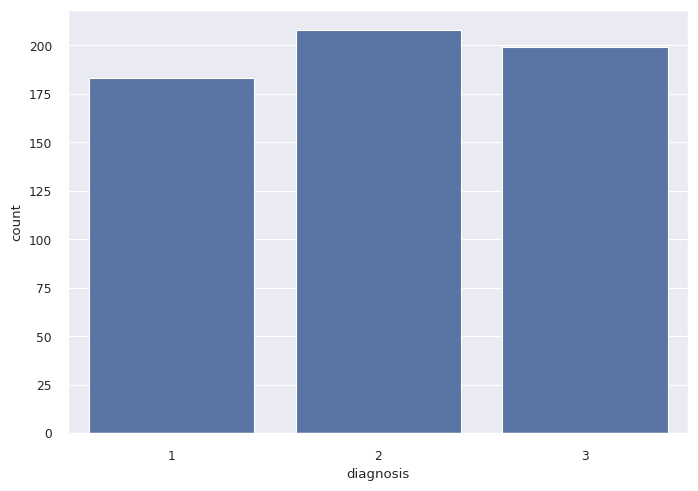

In [ ]:
sns.countplot(data = df, x = 'diagnosis')

In [ ]:
df.sample(5).T

sample_id,S36,S261,S317,S195,S251
patient_cohort,Cohort1,Cohort2,Cohort2,Cohort1,Cohort2
sample_origin,BPTB,BPTB,BPTB,LIV,BPTB
age,48,74,80,71,40
sex,F,F,M,M,M
diagnosis,1,2,2,2,2
stage,NaN,NaN,NaN,NaN,NaN
benign_sample_diagnosis,NaN,Cholecystitis,Pancreatitis (Gallstone),Pancreatitis,Pancreatitis (Alcohol-Chronic)
plasma_CA19_9,NaN,NaN,NaN,22.0,21.0
creatinine,0.46371,0.75777,0.3393,0.89349,0.62205
LYVE1,0.001855,0.222569,1.250582,3.066153,1.492887


In [ ]:
df.isnull().sum()

,0
patient_cohort,0
sample_origin,0
age,0
sex,0
diagnosis,0
stage,391
benign_sample_diagnosis,382
plasma_CA19_9,240
creatinine,0
LYVE1,0


In [ ]:
features_to_ignore = ['patient_cohort', 'sample_origin','stage','benign_sample_diagnosis']

In [ ]:
s = setup(df, target = 'diagnosis', experiment_name = 'pancreas', train_size = 0.8, session_id = 71, numeric_imputation = 'median',ignore_features = features_to_ignore, normalize = True)

,Description,Value
0,Session id,71
1,Target,diagnosis
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2"
4,Original data shape,"(590, 13)"
5,Transformed data shape,"(590, 9)"
6,Transformed train set shape,"(472, 9)"
7,Transformed test set shape,"(118, 9)"
8,Ignore features,4
9,Numeric features,7


In [ ]:
best = compare_models(n_select = 5,sort = 'Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7477,0.0000,0.7477,0.7521,0.7466,0.6211,0.6238,0.7390
xgboost,Extreme Gradient Boosting,0.7456,0.8797,0.7456,0.7528,0.7446,0.6180,0.6219,0.2820
rf,Random Forest Classifier,0.7138,0.8751,0.7138,0.7155,0.7111,0.5705,0.5734,0.2730
et,Extra Trees Classifier,0.7137,0.8582,0.7137,0.7203,0.7127,0.5701,0.5735,0.1940
lightgbm,Light Gradient Boosting Machine,0.7074,0.8753,0.7074,0.7138,0.7057,0.5608,0.5645,1.7690
ada,Ada Boost Classifier,0.6290,0.0000,0.6290,0.6486,0.6232,0.4413,0.4513,0.3550
dt,Decision Tree Classifier,0.6273,0.7194,0.6273,0.6358,0.6253,0.4401,0.4446,0.0560
lr,Logistic Regression,0.6098,0.0000,0.6098,0.6245,0.6095,0.4166,0.4220,0.9830
svm,SVM - Linear Kernel,0.5613,0.0000,0.5613,0.5721,0.5399,0.3424,0.3535,0.0640
lda,Linear Discriminant Analysis,0.5569,0.0000,0.5569,0.5696,0.5592,0.3359,0.3380,0.0580


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [ ]:
tuned = tune_model(best[0])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7917,0.0000,0.7917,0.7911,0.7862,0.6865,0.6906
1,0.7917,0.0000,0.7917,0.7903,0.7893,0.6865,0.6878
2,0.7234,0.0000,0.7234,0.7272,0.7248,0.5852,0.5856
3,0.7021,0.0000,0.7021,0.6996,0.6960,0.5521,0.5555
4,0.7021,0.0000,0.7021,0.7281,0.7070,0.5524,0.5597
5,0.7021,0.0000,0.7021,0.7171,0.7051,0.5539,0.5573
6,0.7447,0.0000,0.7447,0.7406,0.7382,0.6179,0.6217
7,0.7447,0.0000,0.7447,0.7489,0.7463,0.6155,0.6160
8,0.8085,0.0000,0.8085,0.8130,0.8102,0.7117,0.7121


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


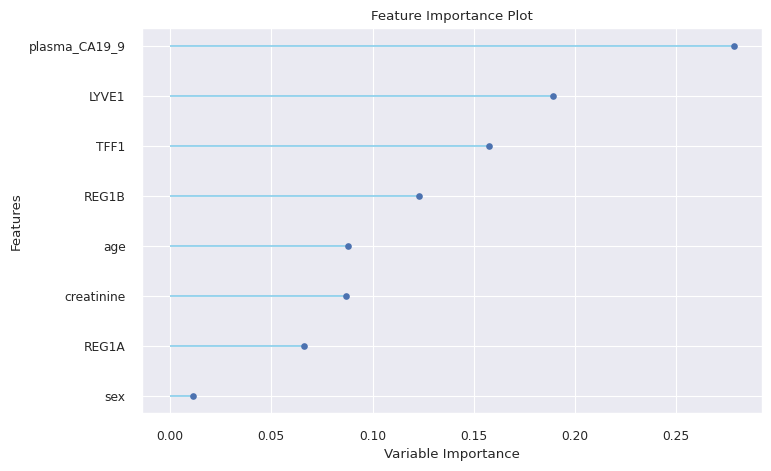

In [ ]:
plot_model(tuned, plot = 'feature')

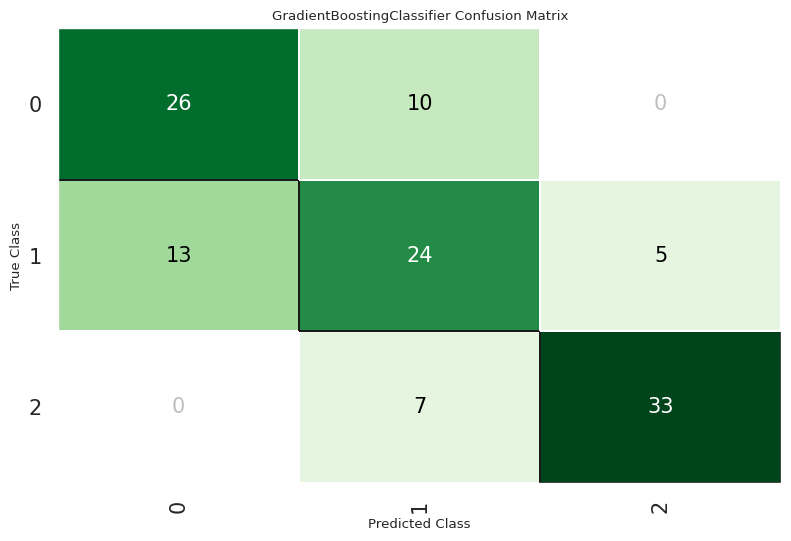

In [ ]:
plot_model(tuned, plot = 'confusion_matrix')

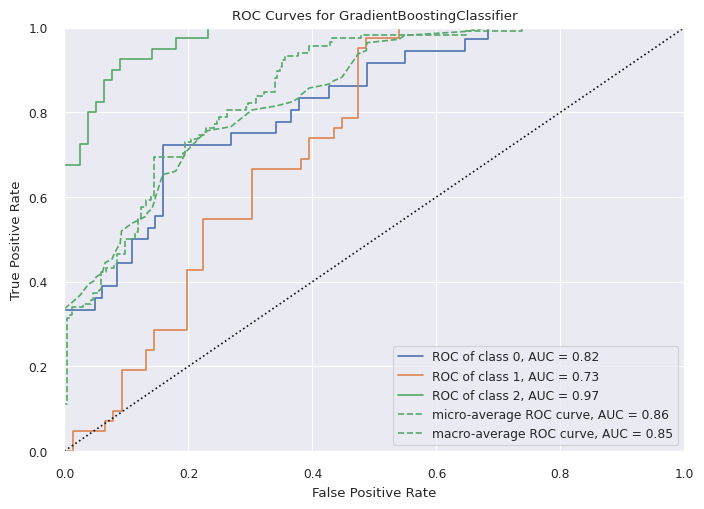

In [ ]:
plot_model(tuned, plot = 'auc')

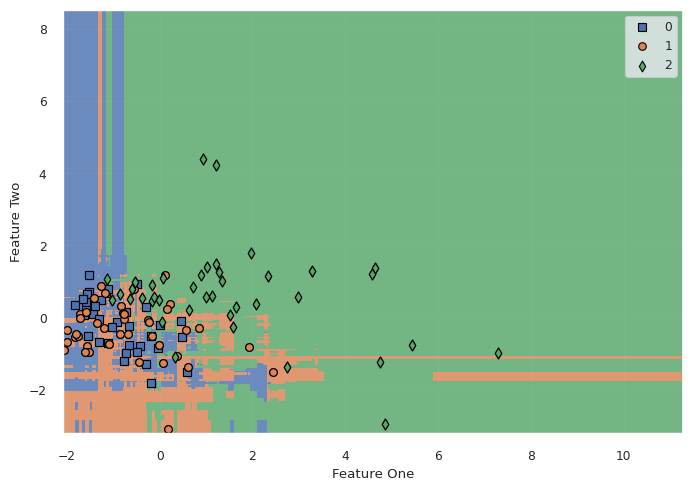

In [ ]:
plot_model(tuned, plot = 'boundary')

In [ ]:
preds = predict_model(tuned)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.7034,0.8412,0.7034,0.7061,0.7042,0.5549,0.5553


In [ ]:
final = finalize_model(tuned)
save_model(final, 'pancreas_pipeline')
preds = predict_model(final)

Transformation Pipeline and Model Successfully Saved


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9153,0.9770,0.9153,0.9175,0.9160,0.8727,0.8731


In [ ]:
tuned


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='log_loss', max_depth=6,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.0005, min_samples_leaf=3,
                           min_samples_split=10, min_weight_fraction_leaf=0.0,
                           n_estimators=80, n_iter_no_change=None,
                           random_state=71, subsample=0.9, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
from pycaret.classification import load_model, predict_model
import pandas as pd

# Load the saved PyCaret model
pycaret_model = load_model('pancreas_pipeline')

# Create a sample test case with the required features
test_data = pd.DataFrame({
    'plasma_CA19_9': [150.5],  # Example values
    'LYVE1': [0.85],
    'TFF1': [1.2],
    'REG1B': [0.6],
    'age': [55],
    'creatinine': [0.9],
    'REG1A': [0.7],
    'sex': [1]
})

# Make prediction
predictions = predict_model(pycaret_model, data=test_data)

# Display the results
print("Predicted Diagnosis:", predictions[['prediction_label', 'prediction_score']])


Transformation Pipeline and Model Successfully Loaded


Predicted Diagnosis:    prediction_label  prediction_score
0                 3            0.7679


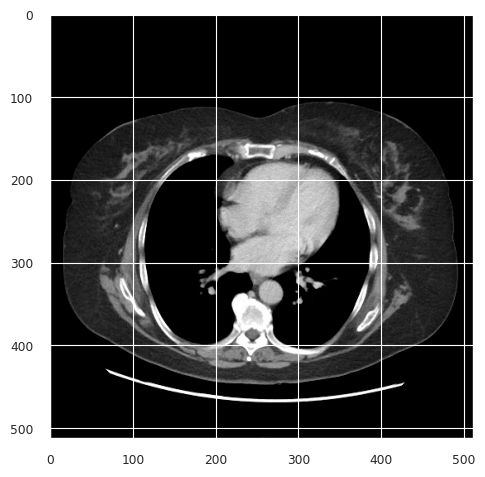

In [ ]:
from keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
import os
import matplotlib.pyplot as plt

# Load the saved model
cnn_model = load_model("/content/drive/MyDrive/archive/M1.h5")

# Path to test images
sample_path = "/content/drive/MyDrive/archive/DATASET/sample"

for img_name in os.listdir(sample_path):
    img_path = os.path.join(sample_path, img_name)

    # Load and preprocess the image
    img = load_img(img_path, target_size=(512,512))
    plt.imshow(img)
    plt.show()


In [ ]:
for img_name in os.listdir(sample_path):
    img_path = os.path.join(sample_path, img_name)

    img = load_img(img_path, target_size=(32, 32))
    img_array = img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    pred = cnn_model.predict(img_array)

    if pred[0][0] > 0.5:
        print(f"{img_name}: Healthy")
    elif pred[0][1] > 0.5:
        print(f"{img_name}: Cancer")
        flag=1
    else:
        print(f"{img_name}: Unknown")

    if flag==1:
        predicted_class = "Cancer"
    else:
      predicted_class = "Normal"
    print(f"Predicted class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Copy of 1-001.jpg: Cancer
Predicted class: Cancer


In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer, set_seed
import torch

model_path="ibm-granite/granite-3.2-8b-instruct-preview"
device="cpu"
model = AutoModelForCausalLM.from_pretrained(
        model_path,
        device_map=device,
        torch_dtype=torch.bfloat16,
    )
tokenizer = AutoTokenizer.from_pretrained(
        model_path
)



config.json:   0%|          | 0.00/856 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/29.8k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.41G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/132 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/8.88k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.48M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/701 [00:00<?, ?B/s]

In [ ]:


# Define your test input values
plasma_CA19_9 = 150.5
LYVE1 = 0.85
TFF1 = 1.2
REG1B = 0.6
age = 55
creatinine = 0.9
REG1A = 0.7
sex = 1


predicted_class = "Cancer"


content = f"""
    'plasma_CA19_9': [{plasma_CA19_9}],
    'LYVE1': [{LYVE1}],
    'TFF1': [{TFF1}],
    'REG1B': [{REG1B}],
    'age': [{age}],
    'creatinine': [{creatinine}],
    'REG1A': [{REG1A}],
    'sex': [{sex}]\n
Predicted class: "Pancreases CT Shows "{predicted_class}
"""

# Define conversation for the LLM
conv = [{"role": "user", "content": content}]

# Tokenize the conversation
input_ids = tokenizer.apply_chat_template(
    conv, return_tensors="pt", thinking=False, return_dict=True, add_generation_prompt=True
).to(device)

# Generate output from the model
set_seed(42)
output = model.generate(
    **input_ids,
    max_new_tokens=8847,
)

# Decode and print the prediction
prediction = tokenizer.decode(output[0, input_ids["input_ids"].shape[1]:], skip_special_tokens=True)
print(prediction)

Generated Output : The given values represent key biomarkers and demographic factors used in assessing pancreatic cancer risk. CA19-9 (150.5 U/mL) is significantly elevated, suggesting a high likelihood of malignancy, though benign conditions can also raise levels. LYVE1, TFF1, REG1A, and REG1B are emerging biomarkers linked to pancreatic cancer progression. The patient age (55) and male sex increase risk, while creatinine (0.9 mg/dL) indicates normal kidney function. Further diagnostic steps CT Scan confirms Pancreatic cancer. Oncological consultation are recommended to confirm malignancy and guide potential treatment strategies.


The given values represent key biomarkers and demographic factors used in assessing pancreatic cancer risk. CA19-9 (150.5 U/mL) is significantly elevated, suggesting a high likelihood of malignancy, though benign conditions can also raise levels. LYVE1, TFF1, REG1A, and REG1B are emerging biomarkers linked to pancreatic cancer progression. The patient's age (55) and male sex increase risk, while creatinine (0.9 mg/dL) indicates normal kidney function. Further diagnostic steps CT Scan confirms Pancreatic cancer. Oncological consultation are recommended to confirm malignancy and guide potential treatment strategies.
